## part a

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def binaryBanditA(action):
    rand = random.random()
    p=[0.15, 0.2]
    if rand < p[action]:
        return 1
    return 0

In [3]:
def binaryBanditB(action):
    rand = random.random()
    p=[0.8, 0.9]
    if rand < p[action]:
        return 1
    return 0

In [4]:
class Bandit(object):
    def __init__(self, N):
        self.N = N
    def actions(self):
        result = []
        for i in range(self.N):
            result.append(i)
        return result
    

In [24]:
bandit = Bandit(N=2)

In [25]:
def egreedy(myBandit, epsilon, max_iteration):
    Q = [0]*myBandit.N 
    count = [0]*myBandit.N
    epsilon = epsilon
    r = 0
    R = []
    R_avg = [0]*1
    max_iter = max_iteration
    # Incremental Implementation
    for iter in range(1,max_iter):
        rew = None
        if random.random() > epsilon:
            action = Q.index(max(Q)) # Exploit/ Greed
            
        else:
            action = random.choice(myBandit.actions()) # Explore
            
        r = binaryBanditA(action)
        R.append(r)
        count[action] = count[action]+1
        Q[action] = Q[action]+(r - Q[action])/count[action]
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

    return Q, R_avg, R

In [26]:
Q, R_avg, R = egreedy(bandit, 0.2, 2000)

Text(0.5, 1.0, 'average rewards acculumated over time')

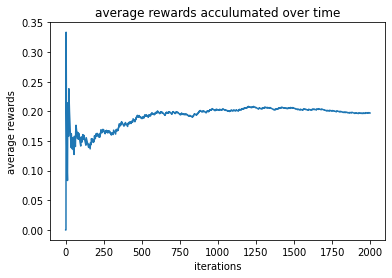

In [27]:
plt.plot(R_avg);
plt.xlabel("iterations")
plt.ylabel("average rewards")
plt.title("average rewards acculumated over time")

In [15]:
def egreedy2(myBandit, epsilon, max_iteration):
    Q = [0]*myBandit.N 
    count = [0]*myBandit.N
    epsilon = epsilon
    r = 0
    R = []
    R_avg = [0]*1
    max_iter = max_iteration
    # Incremental Implementation
    for iter in range(1,max_iter):
        rew = None
        if random.random() > epsilon:
            action = Q.index(max(Q)) # Exploit/ Greed
            
        else:
            action = random.choice(myBandit.actions()) # Explore
            
        r = binaryBanditB(action)
        R.append(r)
        count[action] = count[action]+1
        Q[action] = Q[action]+(r - Q[action])/count[action]
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

    return Q, R_avg, R

In [16]:
Q, R_avg_2, R = egreedy2(bandit, 0.2, 2000)

Text(0.5, 1.0, 'average rewards acculumated over time')

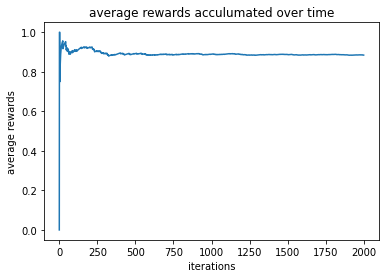

In [17]:
plt.plot(R_avg_2);
plt.xlabel("iterations")
plt.ylabel("average rewards")
plt.title("average rewards acculumated over time")

## part b

In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# --- Bandit ---
class Bandit(object):
    def __init__(self, N):
        self.N = N
        expRewards = np.array([10]*self.N)
        self.expRewards = expRewards
        
    def actions(self):
        result = []
        for i in range(0,self.N):
            result.append(i)
            return result
        
    def incrementReward(self):
        incArray = np.random.normal(0,0.01,10)
        self.expRewards = self.expRewards + incArray
        
    def reward(self, action):
        result = []
        n = random.gauss(0,1)
        result = self.expRewards[action]
        return result
    

In [35]:
def eGreedy3(myBandit, epsilon, max_iteration):
  # Initialization 
    Q = [0]*myBandit.N 
    count = [0]*myBandit.N
    epsilon = epsilon
    r = 0
    R = []
    R_avg = [0]*1
    max_iter = max_iteration
    # Incremental Implementation
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q)) # Exploit/ Greed
        else:
            action = random.choice(myBandit.actions()) # Explore
        r = myBandit.reward(action)
        myBandit.incrementReward()
        R.append(r)
        count[action] = count[action]+1
        Q[action] = Q[action]+(r - Q[action])/count[action]
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

    return Q, R_avg, R

In [45]:
myBandit = Bandit(N=10)

In [46]:
Q_,R_avg_3, R_ = eGreedy3(myBandit, 0.2, 60000)

In [47]:
myBandit.expRewards

array([13.21609277,  9.29850082, 10.49185258, 13.79481382,  9.36552245,
        6.03154158, 10.07917344, 11.48476225, 11.9727892 , 10.63019515])

Text(0.5, 1.0, 'average rewards')

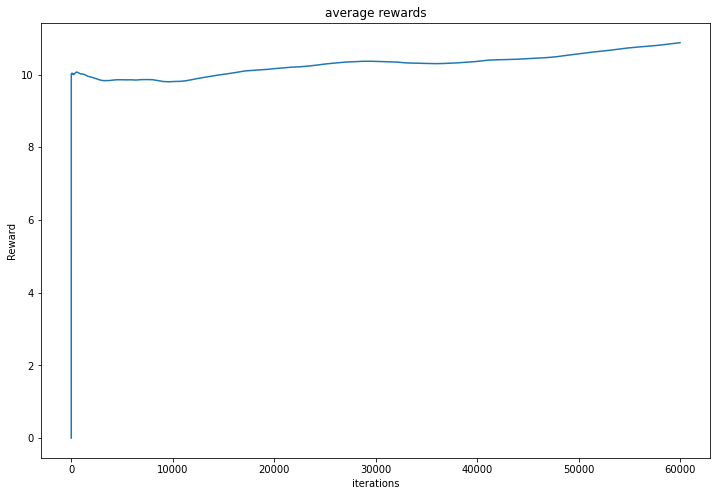

In [48]:
plt.figure(figsize=(12,8));
plt.plot(R_avg_3)
plt.xlabel("iterations")
plt.ylabel("Reward")
plt.title("average rewards")

Text(0.5, 1.0, 'instantaneous rewards given by environment')

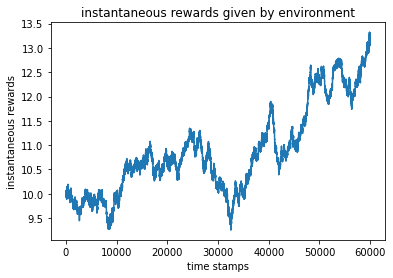

In [49]:
plt.plot(R_);
plt.xlabel("time stamps")
plt.ylabel("instantaneous rewards")
plt.title("instantaneous rewards given by environment")

## part 3

In [50]:
def eGreedy2(myBandit, epsilon, alpha, max_iteration):
  # Initialization 
    Q = [0]*myBandit.N 
    count = [0]*myBandit.N
    epsilon = epsilon
    r = 0
    R = []
    R_avg = [0]*1
    max_iter = max_iteration
    # Incremental Implementation
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q)) # Exploit/ Greed
        else:
            action = random.choice(myBandit.actions()) # Explore
        r = myBandit.reward(action)
        myBandit.incrementReward()
        R.append(r)
        count[action] = count[action]+1
        Q[action] = Q[action]+alpha*(r - Q[action])
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

    return Q, R_avg, R

Text(0.5, 1.0, 'average rewards')

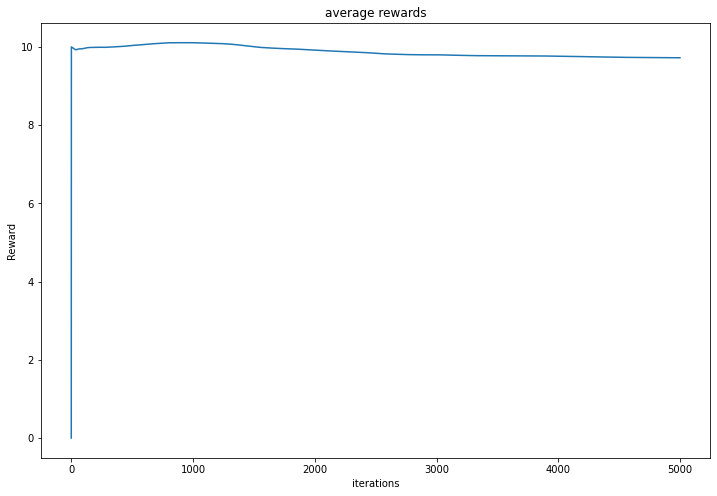

In [51]:
myBandit = Bandit(N=10)
Q,R_avg, R = eGreedy2(myBandit, 0.4, 0.1, 5000)
plt.figure(figsize=(12,8))
plt.plot(R_avg);
plt.xlabel("iterations")
plt.ylabel("Reward")
plt.title("average rewards")

Text(0, 0.5, 'rewards')

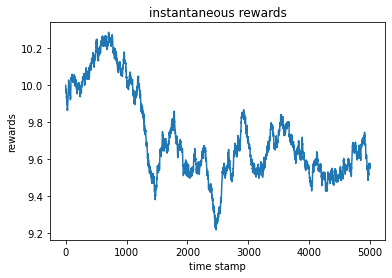

In [52]:
plt.plot(R);
plt.title("instantaneous rewards")
plt.xlabel("time stamp")
plt.ylabel("rewards")

In [53]:
myBandit.expRewards

array([ 9.55221372, 10.2830642 , 11.02299663, 10.79592198,  9.76412533,
       11.2300853 , 10.26925763,  9.38963525,  9.75679881,  9.45406935])